# Heya!
Let's get ready to start getting your hands on some data. In this session (part 2 of the Machine Learning Crash Course Series) we're going to accomplish the following:
  - Pandas & Numpy
  - Load our ML data into Jupyter Notebook
  - Look at and understand our data at a high level
  - Visualize our data
  - Split data into Train and Test sets
    
To make this notebook more concrete, we'll be showing you how to do things with the Kaggle Intro to Machine Learning Titanic Data Set. If you're curious, check out the project here - https://www.kaggle.com/c/titanic.
Ok, let's dive in!

In [76]:
# import these to make handling our data easier, they should have been installed as preparation for this course
import numpy as np
import pandas as pd

#For splitting up our data - train, test, validate
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# this will help us with visualization later
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Wait, hold up - what's numpy and pandas?
Numpy will have likely already been installed on your computer when you installed python. It's a library that in our case will make it much easier to work with multi-dimensional arrays and matrices, fun math stuff.

Pandas is the real star of the show for now, and you'll need it installed for each next step. Pandas is also a library that makes it easy to manipulate and work with data. It'll take your data and make it into a dataframe object that we'll be working with. 

<br>
## Load the Data

In [77]:
#importing my example data as a dataframe and printing it out
data = pd.read_csv('titanic_data.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### Help - My file isn't a CSV
No worries, pandas is pretty flexible with loading documents.
Check out all their reader functions here:  https://pandas.pydata.org/pandas-docs/stable/io.html
(if you have a .tar.giz file try read_csv function with the arguments compression='gzip', error_bad_lines=False )


<br>

## Your Turn - Load the Data!


In [78]:
# # load your data here
# my_data = 
# my_data

<br>
## Exploring the Data
Ok great, we have our data in Jupyter. Looks kinda weird though. Check out all the different columns - do you know what's going on in each of them? Do you know of any assumptions that may have been made in collecting data (i.e. ages were grouped within categories, with ages above 60 all being truncated into one category?). Are there any missing / NaN values that you can spot already? Different types of data (int vs float vs string)?

In [79]:
data.shape #--> rows, columns

(891, 12)

In [80]:
data.columns.values #--> what columns of data are there & do you understand each one?

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [81]:
#Some pandas functions to help you explore
data.head()  #--> Gathers first 5 rows of the dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [82]:
#Some pandas functions to help you explore
data.sample(10)  #--> takes a random sample of X amount from your data, will shuffle every time you reload

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
415,416,0,3,"Meek, Mrs. Thomas (Annie Louise Rowley)",female,NaN,0,0,343095,8.0500,NaN,S
274,275,1,3,"Healy, Miss. Hanora ""Nora""",female,NaN,0,0,370375,7.7500,NaN,Q
696,697,0,3,"Kelly, Mr. James",male,44.0,0,0,363592,8.0500,NaN,S
266,267,0,3,"Panula, Mr. Ernesti Arvid",male,16.0,4,1,3101295,39.6875,NaN,S
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.6500,E67,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
791,792,0,2,"Gaskell, Mr. Alfred",male,16.0,0,0,239865,26.0000,NaN,S
359,360,1,3,"Mockler, Miss. Helen Mary ""Ellie""",female,NaN,0,0,330980,7.8792,NaN,Q
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q


In [83]:
#Some pandas functions to help you explore
data.info()  #--> describes how many values in each column that are non-null and what type of data is in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [84]:
#Some pandas functions to help you explore
data.describe()  #--> describes all your numerical data, calculating mean, standard deviation, percentile, min/max
                 #    can help uncover outliers

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [85]:
#Some pandas functions to help you explore
data.describe(include = ['O']) #--> looking at just the objects

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Boulos, Mr. Hanna",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


<br>
## Your Turn - Explore your Data!

In [86]:
## Try it out on your own data here


<br>
## Visualizing the Data
Visualizing your data is a great way to understand what data you have in front of you, possibly even draw some preliminary insights on what features could have an impact on your final prediction. Keep in mind, depending on the kind of data you have, you may not find this part very useful, or may have to try something else to get a visual look into your data - so take this with a grain of salt and experiment!

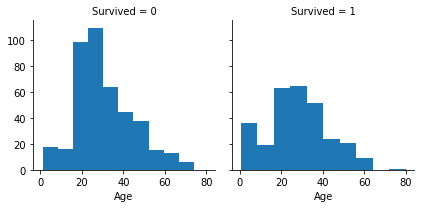

In [87]:
#FacetGrid plots conditional relationships - https://seaborn.pydata.org/generated/seaborn.FacetGrid.html 
grid = sns.FacetGrid(data, col='Survived')
grid.map(plt.hist, 'Age', bins=10)

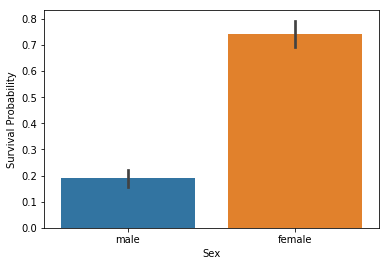

In [88]:
# Measure probability of outcome based on feature (where feature has small finite number of solutions like Gender)
# Find out more here - https://seaborn.pydata.org/generated/seaborn.barplot.html
g = sns.barplot(x="Sex", y="Survived", data=data)
g = g.set_ylabel("Survival Probability")

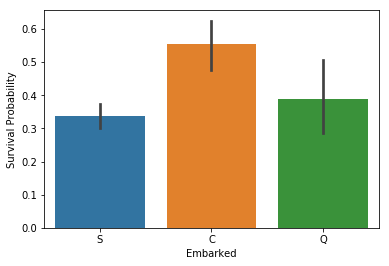

In [89]:
# Measure probability of outcome based on feature (where feature has small finite number of solutions like Gender)
# Find out more here - https://seaborn.pydata.org/generated/seaborn.barplot.html
g = sns.barplot(x="Embarked", y="Survived", data=data)
g = g.set_ylabel("Survival Probability")

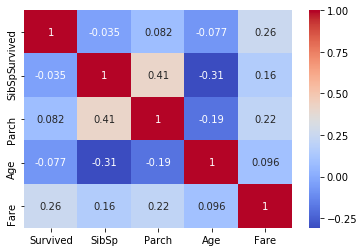

In [90]:
# Correlation matrix between numerical values (SibSp Parch Age and Fare values) and Survived 
# See more here - https://seaborn.pydata.org/generated/seaborn.heatmap.html
g = sns.heatmap(data[["Survived","SibSp","Parch","Age","Fare"]].corr(), annot=True, cmap="coolwarm")

<br>
## Your Turn - Visualize your Data!

In [91]:
## Try it out on your own data here


<br>
## Splitting the Data
When you've reached the point where you're comfortable with your data, it's time to split it up. We'll split it into 3 groups:
1. <b>Training Data</b> - this is what our algorithm will learn from
2. <b>Testing Data</b> - this will be the last big test to measure the accuracy of our algorithm out in the real world
3. <b>K-Folds Cross Validation</b> - this is an approach we can take to increase accuracy at the expense of time

Let's start with <b> train and test data </b>. In order to break up our data, we're going to need to split our data frame into our X (all our features) and our Y (our solution).

In [92]:
#Isolating our 'Y' which is "Survived" with this example
data_x = data.drop("Survived", axis=1) # Drop 'Survived', which is a column (axis 1) from our original data frame
data_y = data["Survived"] # Create a variable we can reference with just our solutions

In [93]:
#Split our data into train and test using SKlearn's train_test_split function
#Random state will randomize the order of our data while still mapping the right X and Y together
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, random_state=42)

In [94]:
#Our index has been randomized, and X now only includes features
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
445,446,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,A34,S
650,651,3,"Mitkoff, Mr. Mito",male,NaN,0,0,349221,7.8958,NaN,S
172,173,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,NaN,S
450,451,2,"West, Mr. Edwy Arthur",male,36.0,1,2,C.A. 34651,27.7500,NaN,S
314,315,2,"Hart, Mr. Benjamin",male,43.0,1,1,F.C.C. 13529,26.2500,NaN,S


<br>
## Your Turn - Split up your Data!

In [95]:
## Try it out on your own data here
## For more details check out http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html 


<br>
## Validating Your Data

<br> 
The last piece you may want to consider is validation, like <b> K-Fold Cross Validation</b>. There's a great video that explains the concept here: https://www.youtube.com/watch?v=TIgfjmp-4BA. Essentially, when we split our data into 'train' and 'test' data, we're making the trade-off - how much data do we lose out on to train our algorithm better versus ensure our algorithm can generalize well. K-Fold Cross Validation helps eliminate this trade-off by essentially breaking up all our data into separate, equal sized chunks. Let's say we break up our data into 10 equal parts. What K-Fold Cross validation will do is take 1 part and separate it to use as test data, then train with the other 9. Then, in a separate run, it will take a different 1 part, use that to test and the rest to train. The function will do this 'K' times (in our case 10 times) until its run through every part of data and used it to train & to test. Lastly, it will average the results from those 10 experiments.

<br>
Depending on the complexity of your model, this could be a great way to maximize the accuracy of your model. We won't be working with this right now, we just want to make you aware of it. When selecting your model, it may be useful for you to use the cross_val_score function, which implements this approach and then scores different algorithms accuracy (http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). 

<br>

The challenge with K-Fold Cross Val is that it takes quite a bit of time, so if you have a lot of data or are building a pretty complex model (i.e. neural net) this may not be the best solution. Instead you can break up your data into 3 chunks: train, validate, test.

In [101]:
## Optional - try to break up your data into 3 - train, validate,test
## Hint: One way you could do this - 
##       use train_test_split, increase the size of your test data, then split test into: test & validate with iloc
##       https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iloc.html

